In [1]:
import numpy as np
import pickle as pkl
import scipy.interpolate as interp
import scipy, sys, time
from bisect import bisect_left
import matplotlib.pyplot as plt
import scipy.signal as signal
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import load_dir
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [2]:
%matplotlib notebook

In [75]:
test = force_vs_time(0.1e-6,0e-6,200e-6,3,"x",100e-6, yuk_or_grav="yuk",alpha=1,bead_size=3.8e-6)
test2 = force_vs_time(0.1e-6,0e-6,200e-6,3,"z",100e-6, yuk_or_grav="yuk",alpha=1,bead_size=3.8e-6)

Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 0.0e+00 for separation
Taking 8.5e-21 for height
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 0.00e+00 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 0.0e+00 for separation
Taking 8.5e-21 for height
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 0.00e+00 is selected
A height of 8.47e-21 is selected


<IPython.core.display.Javascript object>


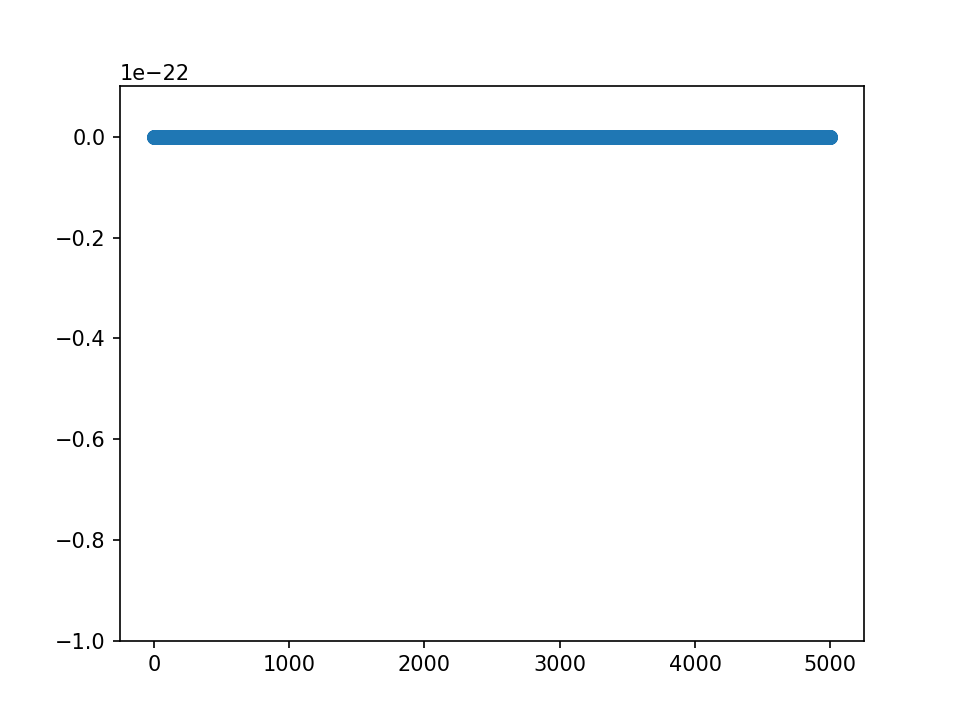

[(-1e-22, 1e-23)]

In [76]:
_,ax = plt.subplots()
ax.scatter(range(5000), test2[1])
ax.set(ylim=(-1e-22,1e-23))

<IPython.core.display.Javascript object>


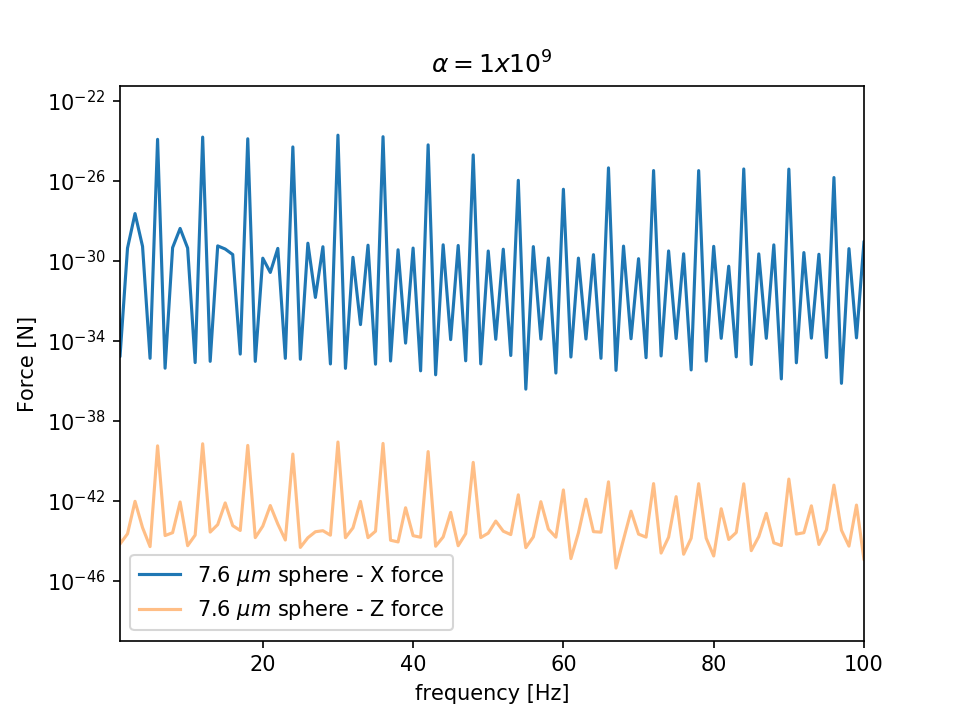

X force [N]: [1.57347258e-24]
Z force [N]: [7.28335914e-40]


In [79]:
def fft_norm(N, fsamp):
    "Factor to normalize FFT to ASD units"
    return np.sqrt(2 / (N * fsamp))
scale = np.sqrt(2)*fft_norm(5000, 5000)

_,ax = plt.subplots()
x = test[1]
x2 = test2[1]
fft = np.abs(np.fft.rfft(x))*scale
fft2 = np.abs(np.fft.rfft(x2))*scale
freq = np.fft.rfftfreq(len(x), d=1./5000)
ax.semilogy(freq, fft, label='7.6 $\mu m$ sphere - X force')
ax.semilogy(freq, fft2, label='7.6 $\mu m$ sphere - Z force', alpha=0.5)
ax.set(xlim=(1,100), ylim=(None,None), xlabel='frequency [Hz]', ylabel='Force [N]', title=r'$\alpha=1x10^{9}$')
ax.legend()
print('X force [N]:', fft[freq==36])
print('Z force [N]:', fft2[freq==36])

In [81]:
#SI units
G = 6.67e-11
Ms = 100e-12*1e-3 #100pg
Ma = 5e-6*5e-6*2e-6*19300 #attractor model
R = 5e-6
print(G*Ms*Ma/R/R)

2.5746199999999995e-25


In [20]:
test2 = force_vs_position(9e-6,6e-6,"z",10e-6,yuk_or_grav="grav",alpha=0)
test3 = force_vs_position(9e-6,6e-6,"z",10e-6,yuk_or_grav="yuk",alpha=1)

Your choice of lambda is not existing
Taking 1.00e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 9.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 9.00e-06 is selected
A height of 6.00e-06 is selected


<IPython.core.display.Javascript object>


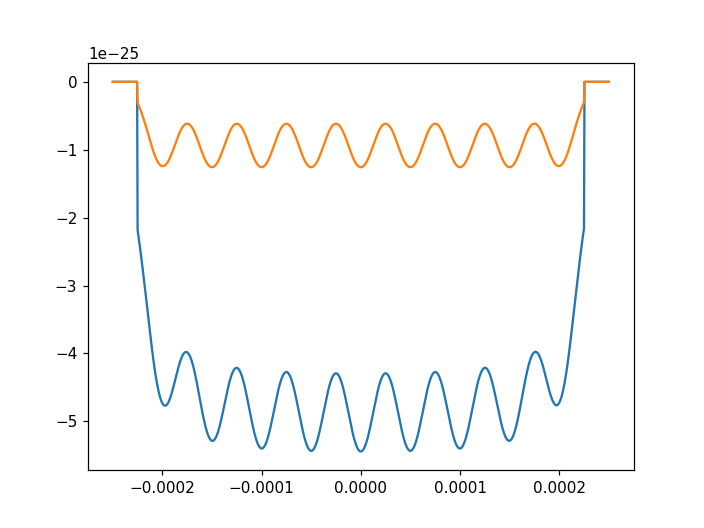

-5.443085967199517e-25


In [6]:
plt.plot(test2[0],test2[1])
plt.plot(test3[0],test3[1])

print(np.min(test2[1]))

<IPython.core.display.Javascript object>


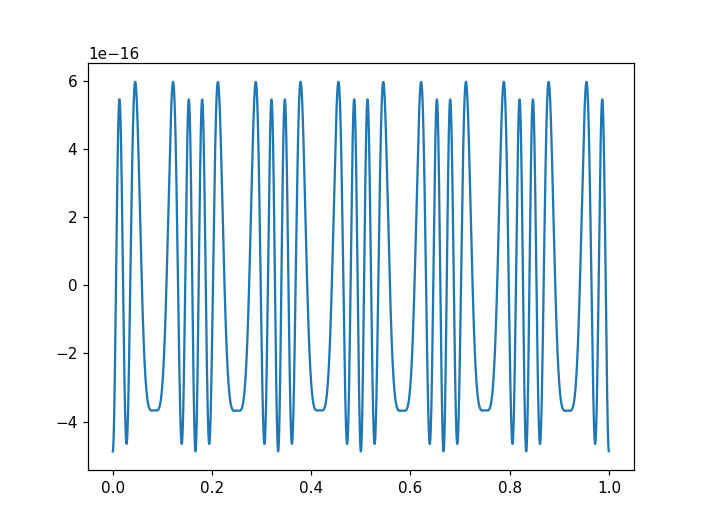

In [53]:
_,ax = plt.subplots()
ax.plot(test[0],test[1]-np.mean(test[1]))
# ax.plot(test2[0],test2[1]-np.mean(test2[1]))
# plt.xlim(0,1/13.*2)

<IPython.core.display.Javascript object>


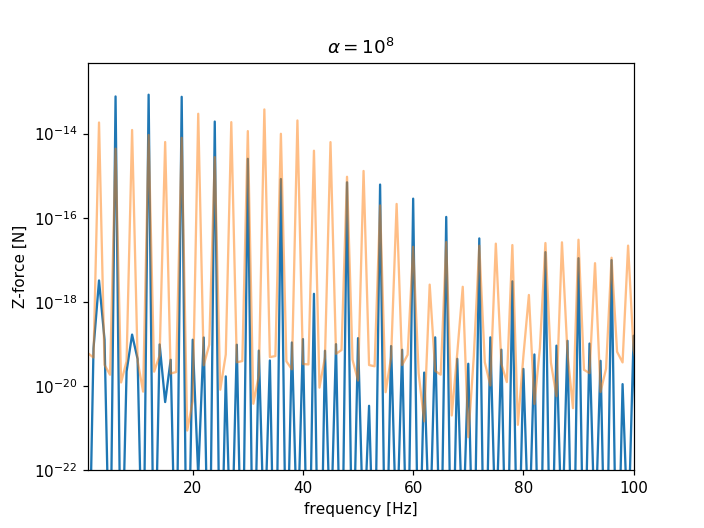

array([1.67646724e-20])

In [46]:
test_small = force_vs_time(8e-6,5e-6,100e-6,3,"z",lambda_par=10e-6,yuk_or_grav="yuk",alpha=1e8,bead_size=2.4e-6)
test_big = force_vs_time(8e-6,5e-6,100e-6,3,"z",lambda_par=10e-6,yuk_or_grav="yuk",alpha=1e8,bead_size=3.8e-6)

Your choice of lambda is not existing
Taking 1.00e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 5.00e-06 is selected
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 8.00e-06 is selected
A height of 5.00e-06 is selected


<IPython.core.display.Javascript object>


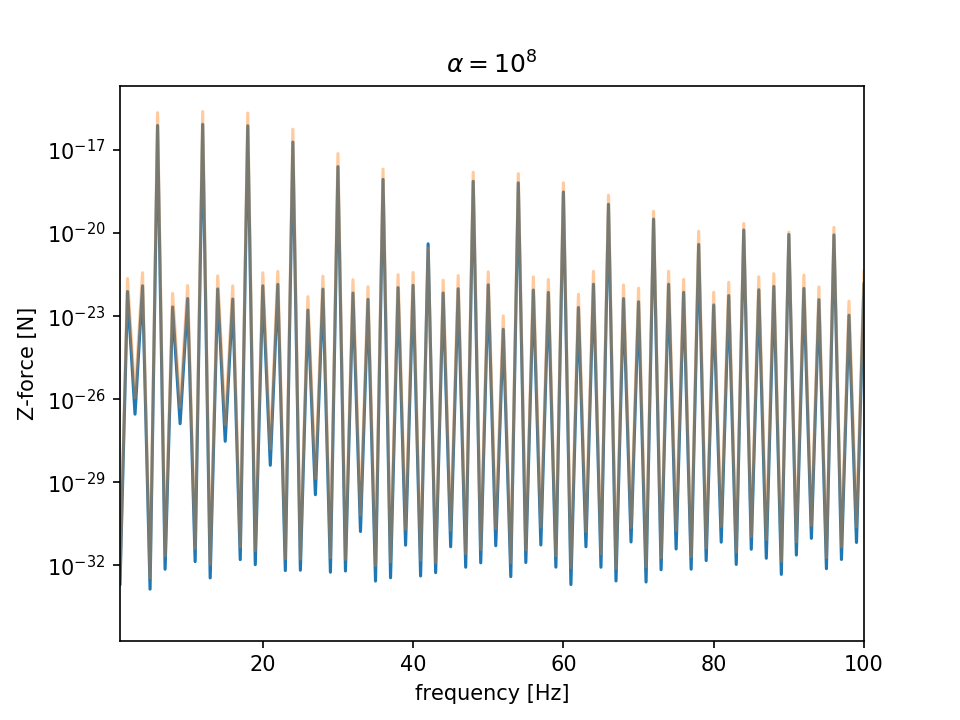

[2.88970047]


In [47]:
_,ax = plt.subplots()
x = test_small[1]-np.mean(test_small[1])
fft = np.abs(np.fft.rfft(x, norm='ortho'))
freq = np.fft.rfftfreq(len(x), d=1./5000)
ax.semilogy(freq, fft)

x2 = test_big[1]-np.mean(test_big[1])
fft2 = np.abs(np.fft.rfft(x2, norm='ortho'))
freq2 = np.fft.rfftfreq(len(x2), d=1./5000)
ax.semilogy(freq2, fft2, alpha=0.4)

ax.set(xlim=(1,100), xlabel='frequency [Hz]', ylabel='Z-force [N]', title=r'$\alpha=10^8$')

print(fft2[freq2==18]/fft[freq==18])